# 基于《南方周末》2008-2023 报道数据的 LDA 主题建模与情感分析

522024110018 黄靖翔

## 项目摘要

本研究聚焦于《南方周末》2008-2023 年间的报道数据，率先开展情感分析。结果显示，2018年12月-2019年3月期间报道的月平均情感得分显著高于其他时期，表明此阶段报道的情感倾向更为积极。基于这一发现，本研究运用LDA方法构建多个主题模型。研究揭示，2018年12月-2019年3月的报道主题具有更明显的特定性与时效性，因该时段利好事件的发生，报道倾向积极；相较之下，其他时间段的报道主题则更为宽泛与普遍。 

## 引言

《南方周末》在传媒领域颇具影响力，受众广泛。作为时代的记录者，其报道内容详实且多元。通过对各类事件的深入挖掘与呈现，从经济发展、文化动态到民生热点，全方位反映特定时期的社会风貌。同时，这些报道通过选题侧重、观点表达等，或隐或显地传递出舆论导向，为公众看待社会现象提供思路，对社会舆论有着不可忽视的引导作用。基于此，本项目将使用《南方周末》2008-2023年的报道数据进行情感分析和主题建模分析，以探究《南方周末》在这15年间的主要报道议题。 

## 研究方法
1. 情感分析
- 对《南方周末》报道文本蕴含的情感倾向进行判断，如积极、消极或中性，帮助了解作者的情感态度。
2. 主题建模
- 从《南方周末》的报道中自动发现隐藏主题，提炼核心内容，揭示文本潜在结构和语义信息。

## 清洗数据与初步探索

让dataframe的数据单位为新闻报道，仅保留“时间”、“标题”、“正文”三个字段。通过清洗数据与初步探索，方能提出研究问题。

In [11]:
import pandas as pd
from tqdm import tqdm
import re

In [3]:
df = pd.read_csv('new_txts.csv')

In [5]:
def clean_data(df):
    result = []
    for i, text in tqdm(enumerate(df['Text']), total=len(df['Text'])):
        if isinstance(text, str):  # 确保 text 是字符串类型
            lines = text.split('\n')
            for j in range(len(lines)):
                if re.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}',lines[j]):  # 假设时间的格式为 'yyyy-mm-dd HH:MM:SS'
                    time = lines[j]
                    title = lines[j - 2]
                    start = j + 2
                    end = None
                    for k in range(j + 2, len(lines)):
                        if re.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}',lines[k]):
                            end = k - 3  # 去掉最后三行
                            break
                    if end is None:  # 处理最后一篇新闻的情况
                        end = len(lines)
                    content = '\n'.join(lines[start:end])
                    # 去掉末尾的换行符
                    content = content.rstrip('\n')
                    result.append({'标题': title, '时间': time, '正文': content})
    return result

In [12]:
clean_list = clean_data(df)

100%|█████████████████████████████████████| 3680/3680 [00:01<00:00, 2369.84it/s]


In [13]:
df_article = pd.DataFrame(clean_list)

In [14]:
df_article['正文'] = df_article['正文'].str.replace('\n','').str.replace('\xa0', '')

In [20]:
df_article.to_csv('南方周末清洗.csv', index=False)

In [17]:
df_article.tail()

,标题,时间,正文
78326,从健康到环境，你不知道的隐形烟草危害丨世界无烟日,2023-05-31 13:00:17,（赖子欢/图）
78327,月入十万，代购为什么盯上了“网红”会员制超市？,2023-05-31 12:00:00,最近，一则“山姆代购做到月入10万”的消息引发关注，从公众讨论中可见超市代购的火爆。无论是“...
78328,这次上天的，有个戴眼镜的博导,2023-05-31 10:00:00,“神十六”乘组是首个由航天驾驶员、航天飞行工程师、载荷专家三种类型航天员组成的飞行乘组。其中...
78329,临近中高考，这些考前减压方法简单又好用,2023-05-31 20:00:00,（赖子欢/图）
78330,C919首次商飞丨瞬间一周,2023-05-31 23:30:00,2023年5月28日12时31分，经历1小时59分钟飞行，由C919大型客机执飞的东方航空M...


去除正文以“/图)”为结尾的数据及正文为空白的数据

In [26]:
df_article = df_article[~df_article['正文'].str.endswith('/图）')]
df_article = df_article[df_article['正文'].str.strip() != '']
df_article = df_article.reset_index(drop=True)
print(df_article)

                                   标题                   时间  \
0                       无锡：一个城市与污染的战争  2008-01-02 11:54:06   
1                            钱，就这么折腾着  2008-01-02 10:12:30   
2                      交通发达了，我们却回不了家了  2008-01-02 10:31:16   
3                              化不掉的冰山  2008-01-03 18:46:43   
4                             赶C超T买房记  2008-01-03 18:46:06   
...                               ...                  ...   
73889         宋明炜：粤港澳文化所代表的中国传统依然生机勃勃  2023-05-31 23:00:00   
73890  新司法解释重锤强奸、猥亵儿童，还应推进女童男童平等保护丨快评  2023-05-31 15:00:00   
73891    埃尔多安连任总统玄机，建国百年的“土耳其三变”丨智库视点  2023-05-31 14:00:02   
73892         月入十万，代购为什么盯上了“网红”会员制超市？  2023-05-31 12:00:00   
73893                  这次上天的，有个戴眼镜的博导  2023-05-31 10:00:00   

                                                      正文  \
0      无锡：一个城市与污染的战争“苏南模式”的另一面是严重的工业污染。无锡，这个太湖之滨的“苏南模...   
1      钱可以做很多事，为什么非要这样折腾？就我们学院而言，每年发论文的钱集起来可以支持好几个有意义...   
2      问题就出在在铁路部门内部总有一些蛀虫，脑满肥肠，与黄牛党里应外合，助其一臂之力，使道高始终不...   
3      　　那人的妻子值

## 测量文本特征

测量报道的情感倾向

情感测量方法为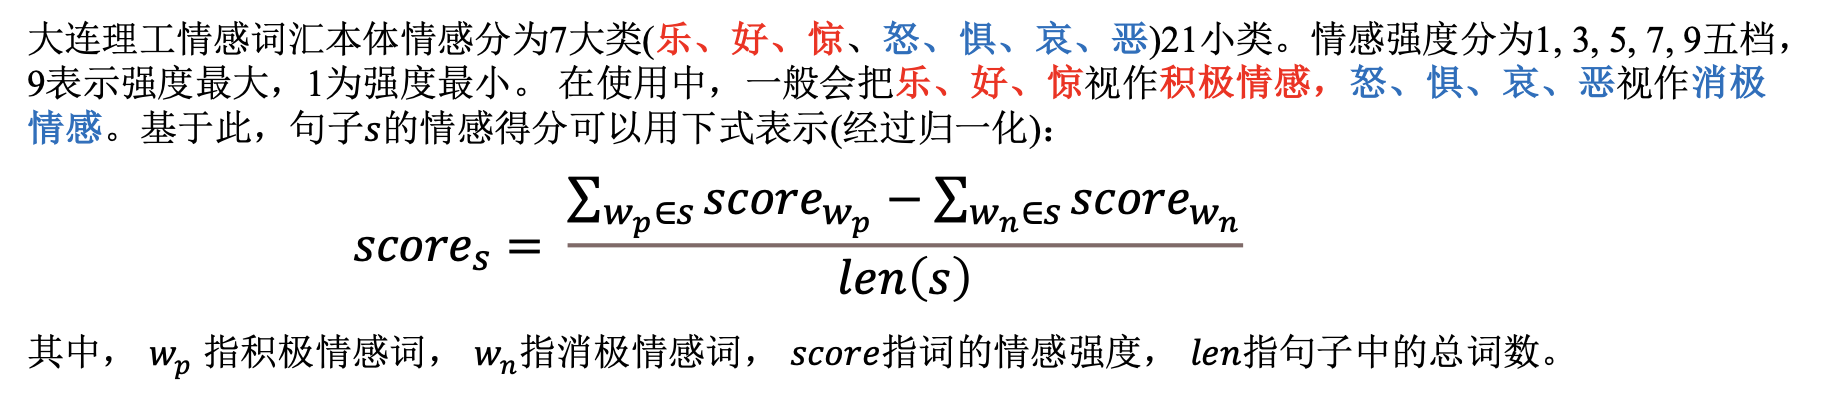

In [21]:
def clean_and_tokenize(text):
    text = re.sub(r"[^\u4e00-\u9fa5]", "", str(text))  # 去除特殊字符和标点符号，只保留中文字符
    words = jieba.cut(text)  # 分词
    return " ".join(words)

emotion_df = pd.read_excel('/Users/jing/Documents/dic/情感词汇本体.xlsx')
emotion_df = emotion_df[['词语', '情感分类', '强度']]

# 分类情感词汇
emotion_categories = {
    'Happy': ['PA', 'PE'],
    'Good': ['PD', 'PH', 'PG', 'PB', 'PK'],
    'Surprise': ['PC'],
    'Sad': ['NB', 'NJ', 'NH', 'PF'],
    'Fear': ['NI', 'NC', 'NG'],
    'Disgust': ['NE', 'ND', 'NN', 'NK', 'NL'],
    'Anger': ['NAU']
}

emotion_words = {emotion: [] for emotion in emotion_categories.keys()}
words_score = {emotion: {} for emotion in emotion_categories.keys()}

for _, row in emotion_df.iterrows():
    for emotion, codes in emotion_categories.items():
        if row['情感分类'] in codes:
            emotion_words[emotion].append(row['词语'])
            words_score[row['词语']] = row['强度']
            break

Positive = emotion_words['Happy'] + emotion_words['Good'] + emotion_words['Surprise']
Negative = emotion_words['Anger'] + emotion_words['Sad'] + emotion_words['Fear'] + emotion_words['Disgust']

# 定义情感计算函数
def emotion_caculate(text):
    wordlist = text.split()
    emotion_info = {emotion: 0 for emotion in emotion_words.keys()}
    emotion_info.update({'length': len(wordlist), 'positive_num': 0, 'negative_num': 0, 'pos_score': 0, 'neg_score': 0, 'score': 0})

    for word in wordlist:
        for emotion, words in emotion_words.items():
            if word in words:
                emotion_info[emotion] += 1
        if word in Positive:
            emotion_info['positive_num'] += 1
            emotion_info['pos_score'] += words_score[word]
            emotion_info['score'] += words_score[word]
        if word in Negative:
            emotion_info['negative_num'] += 1
            emotion_info['neg_score'] += words_score[word]
            emotion_info['score'] -= words_score[word]
    return pd.Series(emotion_info)


In [5]:
df_article = pd.read_csv('南方周末清洗.csv')

In [22]:
df_article['正文分词'] = None

In [23]:
from tqdm import tqdm
import re
import jieba
for i in tqdm(range(len(df_article))):
    df_article.loc[i, '正文分词'] = clean_and_tokenize(df_article.loc[i, '正文'])

  0%|                                                 | 0/74654 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/9x/j_7cm_y109b5sg5tpf7h7gxm0000gn/T/jieba.cache
Loading model cost 0.287 seconds.
Prefix dict has been built successfully.
100%|████████████████████████████████████| 74654/74654 [04:31<00:00, 274.50it/s]


In [27]:
df_article.head()

,标题,时间,正文,正文分词
0,无锡：一个城市与污染的战争,2008-01-02 11:54:06,无锡：一个城市与污染的战争“苏南模式”的另一面是严重的工业污染。无锡，这个太湖之滨的“苏南模...,无锡 一个 城市 与 污染 的 战争 苏南 模式 的 另一面 是 严重 的 工业污染 无锡 ...
1,钱，就这么折腾着,2008-01-02 10:12:30,钱可以做很多事，为什么非要这样折腾？就我们学院而言，每年发论文的钱集起来可以支持好几个有意义...,钱 可以 做 很多 事 为什么 非 要 这样 折腾 就 我们 学院 而言 每年 发 论文 的...
2,交通发达了，我们却回不了家了,2008-01-02 10:31:16,问题就出在在铁路部门内部总有一些蛀虫，脑满肥肠，与黄牛党里应外合，助其一臂之力，使道高始终不...,问题 就 出 在 在 铁路 部门 内部 总有 一些 蛀虫 脑满 肥肠 与 黄牛党 里应外合 ...
3,化不掉的冰山,2008-01-03 18:46:43,那人的妻子值夜班时被杀，五年后案子破了。妻子是因保卫单位财产，被一个入室行窃的小偷打死。...,那人 的 妻子 值夜班 时 被 杀 五年 后 案子 破 了 妻子 是 因 保卫 单位 财产 ...
4,赶C超T买房记,2008-01-03 18:46:06,她一方面看不起这段感情与婚姻，另一方面又强调这屋子的感情附加值——或者只是为了增加财产分配？,她 一方面 看不起 这 段 感情 与 婚姻 另一方面 又 强调 这 屋子 的 感情 附加值 ...


In [28]:
emotion_results = []
for i in tqdm(range(len(df_article)), desc="Calculating Emotions"):
    emotion_results.append(emotion_caculate(df_article.loc[i, '正文分词']))

emotion_df = pd.DataFrame(emotion_results)
df_sent = pd.concat([df_article, emotion_df], axis=1)

Calculating Emotions: 100%|█████████████| 73894/73894 [8:41:29<00:00,  2.36it/s]


In [29]:
df_sent.head()

,标题,时间,正文,正文分词,Happy,Good,Surprise,Sad,Fear,Disgust,Anger,length,positive_num,negative_num,pos_score,neg_score,score
0,无锡：一个城市与污染的战争,2008-01-02 11:54:06,无锡：一个城市与污染的战争“苏南模式”的另一面是严重的工业污染。无锡，这个太湖之滨的“苏南模...,无锡 一个 城市 与 污染 的 战争 苏南 模式 的 另一面 是 严重 的 工业污染 无锡 ...,1,0,0,0,0,4,0,54,1,4,3,16,-13
1,钱，就这么折腾着,2008-01-02 10:12:30,钱可以做很多事，为什么非要这样折腾？就我们学院而言，每年发论文的钱集起来可以支持好几个有意义...,钱 可以 做 很多 事 为什么 非 要 这样 折腾 就 我们 学院 而言 每年 发 论文 的...,1,1,0,0,0,2,0,61,2,2,12,14,-2
2,交通发达了，我们却回不了家了,2008-01-02 10:31:16,问题就出在在铁路部门内部总有一些蛀虫，脑满肥肠，与黄牛党里应外合，助其一臂之力，使道高始终不...,问题 就 出 在 在 铁路 部门 内部 总有 一些 蛀虫 脑满 肥肠 与 黄牛党 里应外合 ...,0,2,0,0,0,3,0,60,2,3,6,17,-11
3,化不掉的冰山,2008-01-03 18:46:43,那人的妻子值夜班时被杀，五年后案子破了。妻子是因保卫单位财产，被一个入室行窃的小偷打死。...,那人 的 妻子 值夜班 时 被 杀 五年 后 案子 破 了 妻子 是 因 保卫 单位 财产 ...,1,26,0,0,0,9,0,446,27,9,138,45,93
4,赶C超T买房记,2008-01-03 18:46:06,她一方面看不起这段感情与婚姻，另一方面又强调这屋子的感情附加值——或者只是为了增加财产分配？,她 一方面 看不起 这 段 感情 与 婚姻 另一方面 又 强调 这 屋子 的 感情 附加值 ...,0,0,0,0,0,1,0,22,0,1,0,5,-5


In [33]:
df_sent.to_csv('情感.csv', index=False)

In [31]:
df_sent['avg_sent'] = df_sent['score']/df_sent['length']

In [37]:
def calculate_morality(df):
    df['Individualizing_Morality'] = df['care'] + df['fair']
    df['Binding_Morality'] = df['loya'] + df['auth'] + df['sanc']
    df['avg_Individualizing'] = df.apply(lambda row: row['Individualizing_Morality']/row['length'] if row['length']!= 0 else 0, axis=1)
    df['avg_Binding'] = df.apply(lambda row: row['Binding_Morality']/row['length'] if row['length']!= 0 else 0, axis=1)
    return df

df = calculate_morality(df)

In [38]:
df.head()

,标题,时间,正文,正文分词,Happy,Good,Surprise,Sad,Fear,Disgust,...,libe,loya,mode,resi,sanc,wast,Individualizing_Morality,Binding_Morality,avg_Individualizing,avg_Binding
0,无锡：一个城市与污染的战争,2008-01-02 11:54:06,无锡：一个城市与污染的战争“苏南模式”的另一面是严重的工业污染。无锡，这个太湖之滨的“苏南模...,无锡 一个 城市 与 污染 的 战争 苏南 模式 的 另一面 是 严重 的 工业污染 无锡 ...,1,0,0,0,0,4,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
1,钱，就这么折腾着,2008-01-02 10:12:30,钱可以做很多事，为什么非要这样折腾？就我们学院而言，每年发论文的钱集起来可以支持好几个有意义...,钱 可以 做 很多 事 为什么 非 要 这样 折腾 就 我们 学院 而言 每年 发 论文 的...,1,1,0,0,0,2,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
2,交通发达了，我们却回不了家了,2008-01-02 10:31:16,问题就出在在铁路部门内部总有一些蛀虫，脑满肥肠，与黄牛党里应外合，助其一臂之力，使道高始终不...,问题 就 出 在 在 铁路 部门 内部 总有 一些 蛀虫 脑满 肥肠 与 黄牛党 里应外合 ...,0,2,0,0,0,3,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
3,化不掉的冰山,2008-01-03 18:46:43,那人的妻子值夜班时被杀，五年后案子破了。妻子是因保卫单位财产，被一个入室行窃的小偷打死。...,那人 的 妻子 值夜班 时 被 杀 五年 后 案子 破 了 妻子 是 因 保卫 单位 财产 ...,1,26,0,0,0,9,...,0,0,0,0,0,0,2,0,0.004484,0.0
4,赶C超T买房记,2008-01-03 18:46:06,她一方面看不起这段感情与婚姻，另一方面又强调这屋子的感情附加值——或者只是为了增加财产分配？,她 一方面 看不起 这 段 感情 与 婚姻 另一方面 又 强调 这 屋子 的 感情 附加值 ...,0,0,0,0,0,1,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN


In [43]:
df.to_csv('情感.csv', index=False)

In [2]:
import pandas as pd 
df = pd.read_csv('情感.csv')

In [48]:
df.shape

(73814, 35)

In [65]:
from matplotlib import rcParams
plt.rcParams['font.family'] = 'Songti SC'

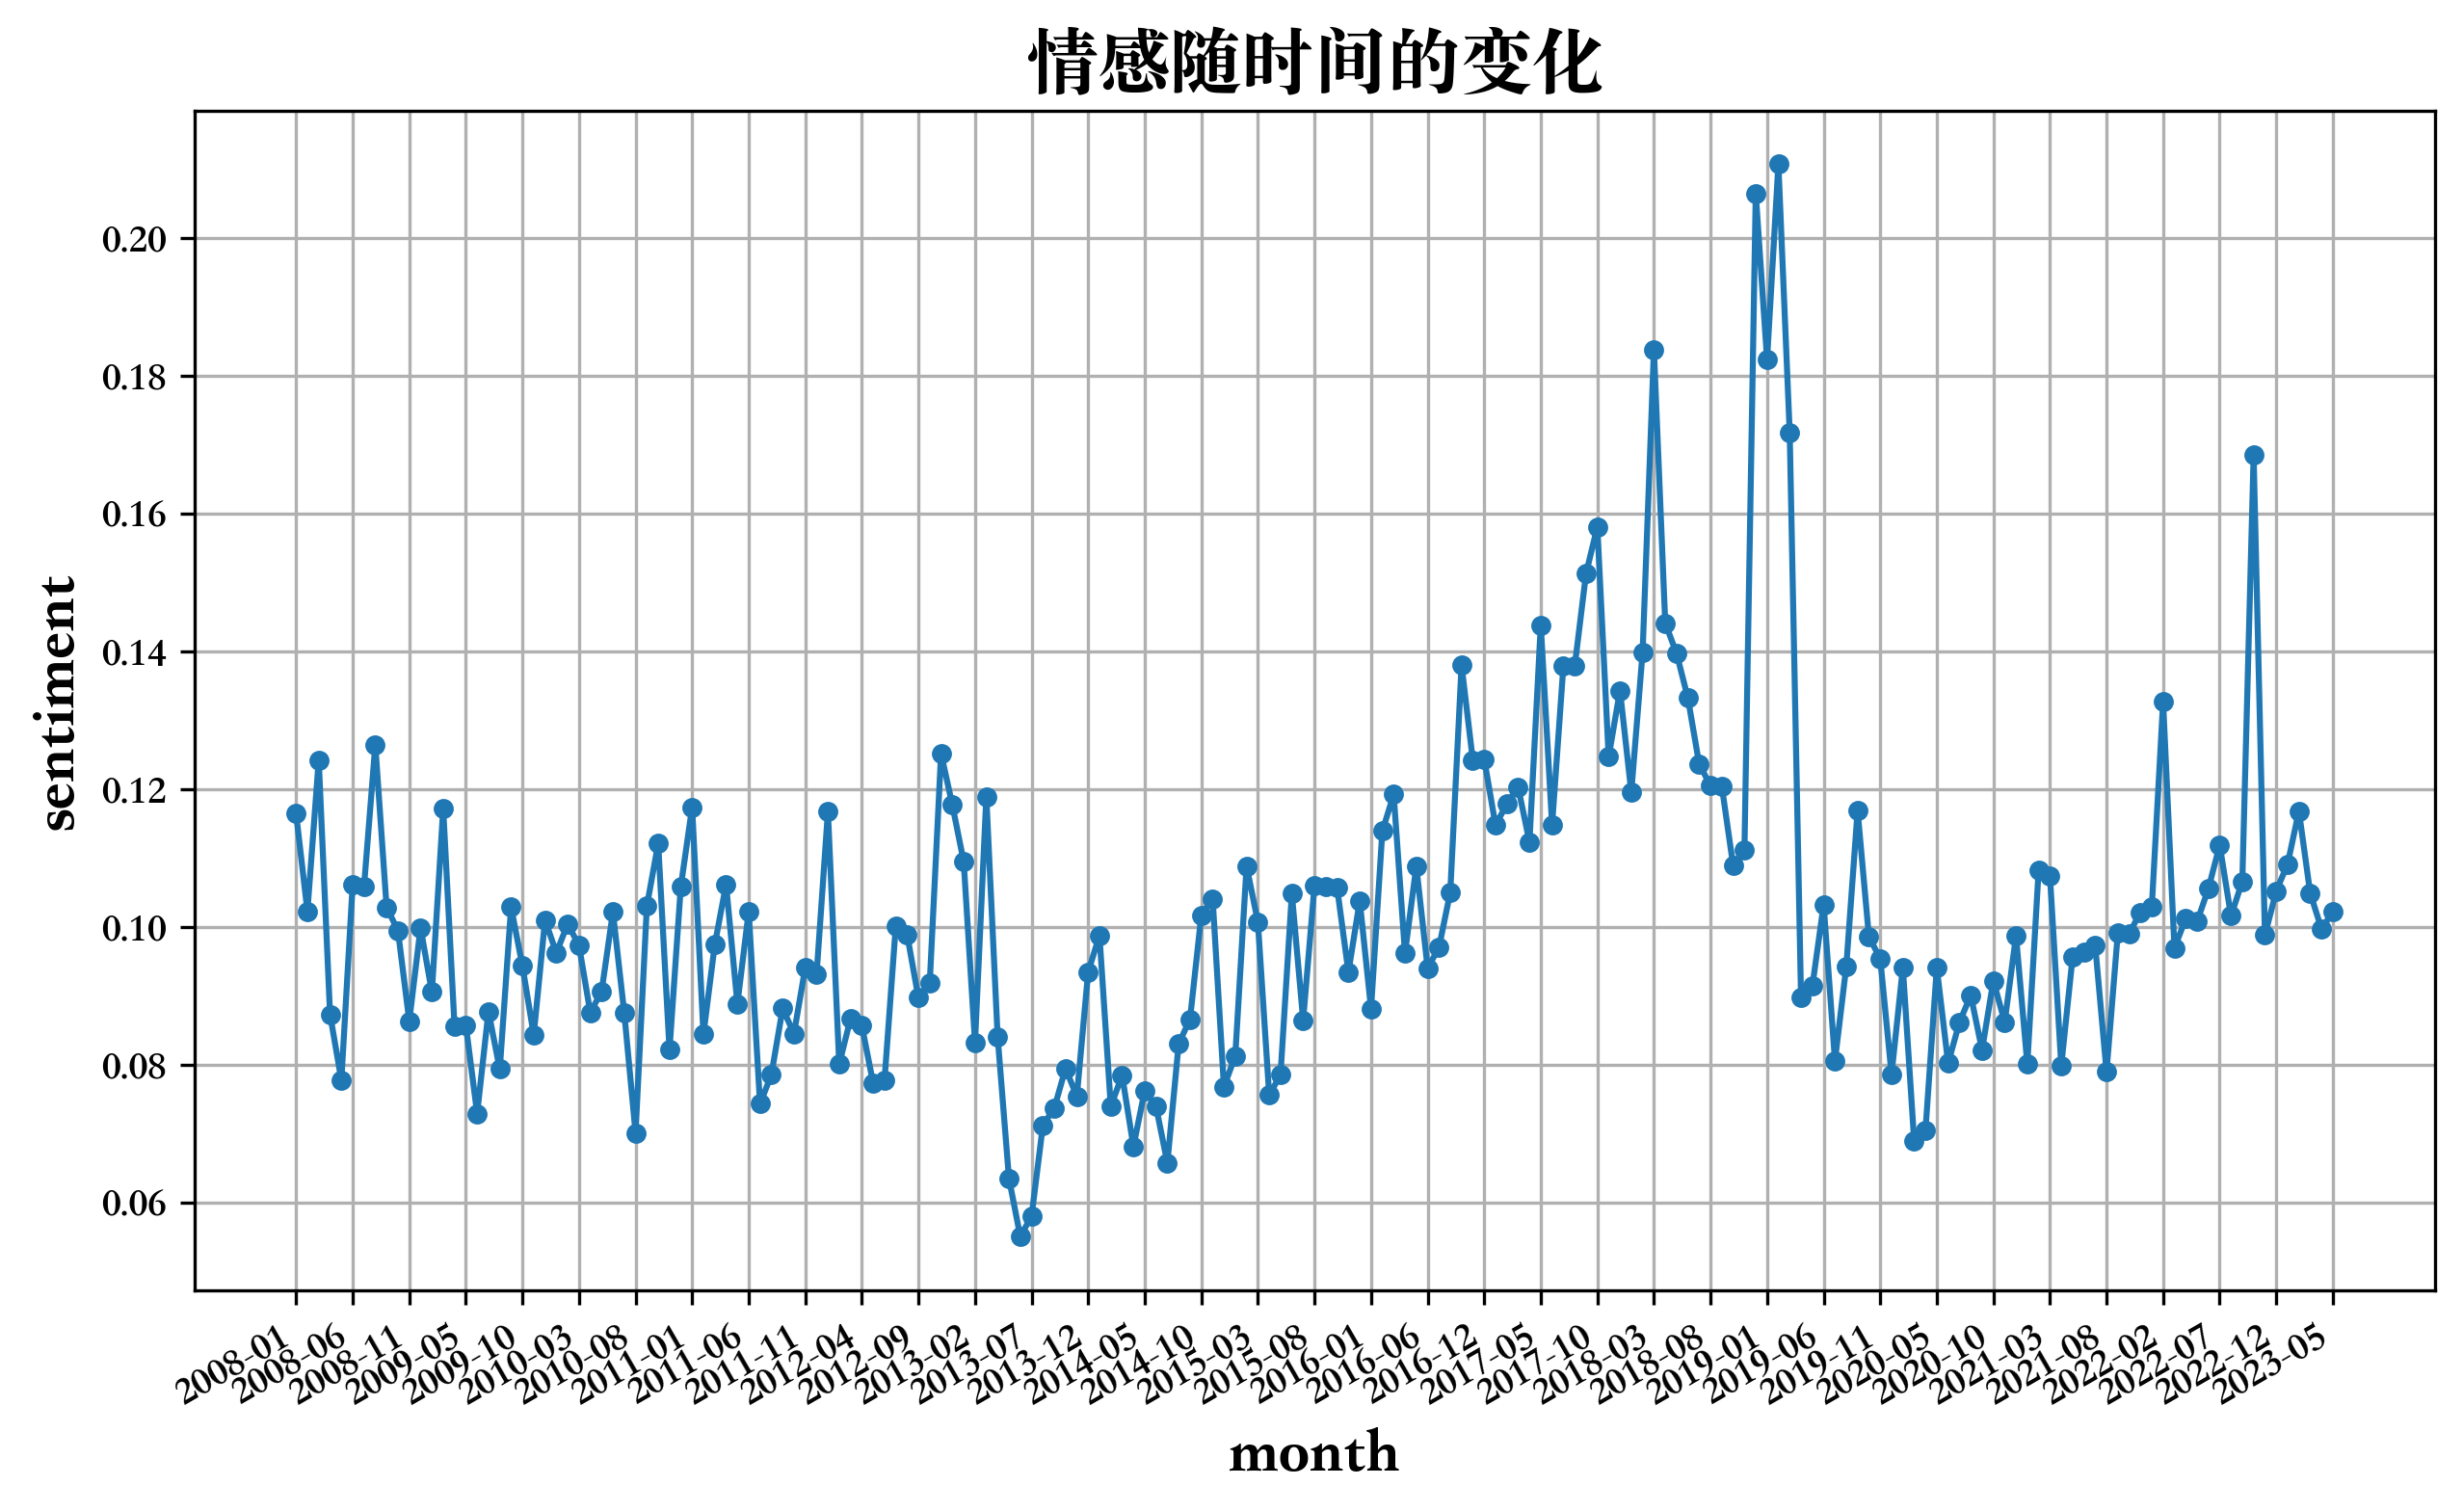

In [76]:
import matplotlib.pyplot as plt

# 以月份为单位，计算每月报道的平均情感
df['时间'] = pd.to_datetime(df['时间'])
df = df.sort_values(by='时间')
df['月份'] = df['时间'].dt.to_period('M')
monthly_avg = df.groupby('月份')['avg_sent'].mean().reset_index()
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['月份'].astype(str), monthly_avg['avg_sent'], marker = 'o', markersize = 4)
plt.xticks(np.arange(0, 185, step=5))

plt.title('情感随时间的变化', size = 18)
plt.xlabel('month', size = 16)
plt.ylabel('sentiment', size = 16)

plt.grid(True)

plt.gcf().autofmt_xdate()

plt.show()

## 研究问题

在对《南方周末》15年间报道数据的初步观察中，发现2018.12-2019.03期间报道的情感相较其他时间更为积极，我们据此提出以下研究问题：
1. 《南方周末》15年间的报道聚焦于什么主题？
2. 2018.12-2019.03这段时间内积极报道背后的主题是什么？
3. 这些主题与其他时间段的主题分布有何差异？


## 研究思路

1. 构建语料库
- 本研究首先对《南方周末》2008 - 2023 年的报道数据根据情感得分正负分别建立语料库构建主题模型，同时，为了探究2018.12-2019.03期间报道的情感为何更加积极，也将这段时间的报道数据作为主题模型的语料库，构建主题模型。
2. 确认主题数
- 对于 “avg_sent > 0” 的数据，通过计算主题一致性，构建出主题数为 5 的 LDA 主题模型；对于 “avg_sent < 0” 的数据，通过计算主题一致性，构建出主题数为 3 的 LDA 主题模型。若存在 “avg_sent == 0” 的情况，则随机分配到两组之一。
3. 主题对比
- 利用 pyLDAvis 对两个主题模型进行可视化展示，直观呈现不同情感倾向数据的主题分布。通过对主题模型结果的分析，结合 2018 年 12 月 - 2019 年 3 月的实际社会背景，探讨该时间段内积极报道的主题特征以及与其他时间段的差异，进而分析这种情感变化的原因。

## 主题模型

In [4]:
import pandas as pd
df = pd.read_csv('情感.csv')

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
from gensim.models import CoherenceModel
import random
from tqdm import tqdm

positive_texts = []
negative_texts = []

df['正文分词'] = df['正文分词'].apply(lambda x: [] if pd.isna(x) else x)
df['正文分词'] = df['正文分词'].apply(lambda x: x if isinstance(x, list) else [x])

for index, row in df.iterrows():
    if row['avg_sent'] > 0:
        positive_texts.append(row['正文分词'])
    elif row['avg_sent'] < 0:
        negative_texts.append(row['正文分词'])
    else:
        if random.choice([True, False]):
            positive_texts.append(row['正文分词'])
        else:
            negative_texts.append(row['正文分词'])

def lda_analysis(texts):
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    min_topics, max_topics, step = 2, 20, 1
    coherence_values = []
    perplexity_values = []

    for num_topics in tqdm(range(min_topics, max_topics + 1, step), desc="正在尝试不同主题数"):
        lda_model = models.LdaModel(corpus=corpus,
                                    id2word=dictionary,
                                    num_topics=num_topics,
                                    random_state=100,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha='auto',
                                    per_word_topics=True)

        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_lda)
        perplexity = lda_model.log_perplexity(corpus)
        perplexity_values.append(perplexity)

    optimal_num_topics_coherence = min_topics + np.argmax(coherence_values) * step
    optimal_num_topics_perplexity = min_topics + np.argmin(perplexity_values) * step

    return optimal_num_topics_coherence, optimal_num_topics_perplexity

positive_optimal_coherence, positive_optimal_perplexity = lda_analysis(positive_texts)
print(f"正类数据基于一致性的最优主题数: {positive_optimal_coherence}")
print(f"正类数据基于困惑度的最优主题数: {positive_optimal_perplexity}")

negative_optimal_coherence, negative_optimal_perplexity = lda_analysis(negative_texts)
print(f"负类数据基于一致性的最优主题数: {negative_optimal_coherence}")
print(f"负类数据基于困惑度的最优主题数: {negative_optimal_perplexity}")

/var/folders/9x/j_7cm_y109b5sg5tpf7h7gxm0000gn/T/ipykernel_10454/4070585178.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  df['正文分词'] = df['正文分词'].apply(lambda x: [] if pd.isna(x) else x)
正在尝试不同主题数:  11%|██▌                     | 2/19 [01:53<16:27, 58.06s/it]python(11070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
pyth

正类数据基于一致性的最优主题数: 5
正类数据基于困惑度的最优主题数: 20


正在尝试不同主题数:   0%|                                | 0/19 [00:00<?, ?it/s]python(12684) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
正在尝试不同主题数:   5%|█▎                      | 1/19 [00:08<02:35,  8.64s/it]python(12704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12706) MallocStackLogging: can't turn off malloc stack logging beca

负类数据基于一致性的最优主题数: 3
负类数据基于困惑度的最优主题数: 20


In [25]:
import pandas as pd
import numpy as np
import jieba
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

df.loc[df['avg_sent'] == 0, 'avg_sent'] = np.random.choice([-1, 1], size=len(df[df['avg_sent'] == 0]))

start_time = datetime.strptime('2018-12-01 00:00:01', '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime('2019-03-31 23:59:59', '%Y-%m-%d %H:%M:%S')
df['时间'] = pd.to_datetime(df['时间'])
time_filtered_df = df[(df['时间'] >= start_time) & (df['时间'] <= end_time)]

positive_df = time_filtered_df[time_filtered_df['avg_sent'] > 0]
zero_df = time_filtered_df[time_filtered_df['avg_sent'] == 0]
random_selection = np.random.choice([True, False], size=len(zero_df))
selected_zero_df = zero_df[random_selection]

final_df = pd.concat([positive_df, selected_zero_df])


def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = [line.strip() for line in f.readlines()]
    return stopwords

def preprocess(text, stopwords):
    tokens = jieba.lcut(text)
    filtered_tokens = [token for token in tokens if token.strip() and token not in stopwords]
    return filtered_tokens

# 停用词表中多为副词、代词、数词等与实际意义关系不大的词
stopwords = load_stopwords('/Users/jing/Documents/chatgpt与人类技能/tasks_asked_to_ChatGPT-main/stopwords.txt')

positive_df = df[df['avg_sent'] > 0]
negative_df = df[df['avg_sent'] < 0]

positive_texts = [preprocess(text, stopwords) for text in positive_df['正文']]
negative_texts = [preprocess(text, stopwords) for text in negative_df['正文']]
positive_2018 = [preprocess(text, stopwords) for text in final_df['正文']]

positive_dictionary = corpora.Dictionary(positive_texts)
positive_corpus = [positive_dictionary.doc2bow(text) for text in positive_texts]

negative_dictionary = corpora.Dictionary(negative_texts)
negative_corpus = [negative_dictionary.doc2bow(text) for text in negative_texts]

final_dictionary = corpora.Dictionary(positive_2018)
final_corpus = [final_dictionary.doc2bow(text) for text in positive_2018]

# 训练 LDA 模型
positive_lda_model = gensim.models.LdaModel(corpus=positive_corpus,
                                            id2word=positive_dictionary,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

negative_lda_model = gensim.models.LdaModel(corpus=negative_corpus,
                                            id2word=negative_dictionary,
                                            num_topics=3,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# 为了和积极报道主题数一致，直接采用了主题数为5进行模型构建
final_lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                            id2word=final_dictionary,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)


positive_vis = gensimvis.prepare(positive_lda_model, positive_corpus, positive_dictionary)
negative_vis = gensimvis.prepare(negative_lda_model, negative_corpus, negative_dictionary)
final_vis = gensimvis.prepare(final_lda_model, final_corpus, final_dictionary)

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
python(67195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(67196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(67197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(67198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(67199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(67200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(67201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(67202) MallocStackLogging: can't turn off m

## 研究发现：主题建模结果分析

2008-2023年积极报道的主题如下：
1. 多元社会与文化生活
2. 消费市场与经济增长
3. 政策改革与民生福祉
4. 突发事件与紧急处置
5. 国际报道

In [19]:
display(pyLDAvis.display(positive_vis))

2008-2023年消极报道的主题如下：
1. 家庭议题与性别议题
2. 新冠病毒与卫生风险
3. 性犯罪报道

In [21]:
display(pyLDAvis.display(negative_vis))

2018.12-2019.03间的积极报道主题如下：
1. 精神文明与艺术建设
2. 经济增长与政策创新
3. 习总书记推动进步
4. 中美贸易摩擦缓和
5. 医药行业取得进步

In [28]:
display(pyLDAvis.display(final_vis))

## 研究结论

问题1:《南方周末》15年间的报道聚焦于什么主题？
- 积极主题：多元社会与文化生活、消费市场与经济增长、政策改革与民生福祉、突发事件与紧急处置、国际报道。
- 消极主题：家庭议题与性别议题、新冠病毒与卫生风险、性犯罪报道。

问题2:2018.12-2019.03这段时间内积极报道背后的主题是什么？
- 精神文明与艺术建设：注重文化艺术领域的发展和精神文明的建设等方面的报道。
- 经济增长与政策创新：关注经济增长以及与之相关的政策创新举措。
- 习总书记推动发展：报道习近平总书记在推动国家各方面发展中的相关内容。
- 中美贸易摩擦缓和：聚焦中美贸易关系中摩擦缓和的相关动态和事件。
- 医药行业取得进步：对医药行业在技术、研发等方面取得的进步进行报道。

问题3:2018.12-2019.03内的报道与其他时间段的主题分布有何差异？
- 2018.12-2019.03更具特定性和时效性
    - 聚焦政策与国际动态：此期间专门提到了习总书记推动发展和中美贸易摩擦缓和(2018年12月1日，G20布宜诺斯艾利斯峰会上，中美达成共识进行谈判，在谈判期内暂停新增贸易措施)，这是特定时期的重要政治和国际经济事件，体现了对当时重大政策和国际关系的高度关注，其他时间段没有这样针对性的主题。
    - 关注行业进步：医药行业取得进步这一主题在2018.12-2019.03突出，说明在这个时期对医药行业的发展给予了特别的关注，而在2008-2023年整体时间段中，医药行业的进步并非是持续时间长久的报道议题。
    - 突出精神文明：精神文明与艺术建设主题在2018.12-2019.03突出，说明在这段时间对精神文化领域的这方面建设更为关注，2008-2023年整体则是更宽泛的多元社会与文化生活。
- 2008-2023年更具广泛性和一般性
    - 涵盖多元社会生活：2008-2023年积极报道中有多元社会与文化生活，是一个更广泛的概念，包含了社会生活的方方面面。
    - 包含突发事件：2008-2023年有突发事件与紧急处置主题，这是一个长期存在的、涉及各类突发情况的主题，而2018.12-2019.03期间没有专门突出这方面，说明在这期间可能没有特别重大的突发事件成为主要报道的积极主题。

## 参考文献

1. Cheng, C. Y., & Zhang, W. (2023). C-mfd 2.0: Developing a chinese moral foundation dictionary. Computational Communication Research, 5(2), 1.
2. 徐琳宏, 林鸿飞, 潘宇, 任惠, & 陈建美. (2008). 情感词汇本体的构造. 情报学报, 27(2), 180-185.